# Simple linear regression (using SKlearn ML)

## Import the relevant libraries

In [3]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

- Goal will be **predicting** GPA using a single feature, SAT score
- Let SAT score = input **feature** (independent variable - y value)
- Let GPA = output **target** (dependent variable - x value)

## Load the data

In [4]:
# We start by loading the data
data = pd.read_csv('data.csv')

# Let's explore the top 5 rows of the df
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## Create the regression

### Declare the dependent and independent variables

In [5]:
# There is a single independent variable: 'SAT'
x = data['SAT']

# and a single depended variable: 'GPA'
y = data['GPA'] 

In [6]:
# Often it is useful to check the shapes of the features
x.shape #(84,) means 84 columns 0 rows

(84,)

In [7]:
y.shape #(84,) means 84 columns 0 rows

(84,)

- In order to feed SAT data (x) to sklearn, it should be a 2D array (a matrix)
- Note that (84,) is only 1D, so we need to reshape it into (84,1) or (42, 2) or (28,3) which is 2D.
- Note that this will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default)

In [8]:
#note that '-1' tells NumPy to automatically calculate the number of rows based on the original array size
x_matrix = x.values.reshape(-1, 1) 

# Check the shape just in case
x_matrix.shape

(84, 1)

In [9]:
# Initialize the regression model
reg = LinearRegression()

In [10]:
# fit the model using reg.fit(inputs,target) train your model with your specific dataset.
# First argument - independent variable, second - dependent
reg.fit(x_matrix,y) 

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [11]:
#Display coefficients
print("Coefficient:", reg.coef_[0])
print("Intercept:", reg.intercept_)

Coefficient: 0.0016556880500928138
Intercept: 0.27504029966028076


### Making Predictions

In [12]:
#np.array([1740]) means 1D, while np.array([[1740]]) means 2D. 
#input SAT score, the model will predict the GPA.
reg.predict(np.array([[1740]]))

array([3.15593751])

In [13]:
# To be in line with our knowledge so far, we can create a pandas data frame with several different values of SAT
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [14]:
# We can predict the whole data frame in bulk
# Note that the result is an array, this time with 2 elements
reg.predict(new_data)

c:\Workflow\Python interpreter\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751, 3.18905127])

In [15]:
# Finally, we can directly store the predictions in a new series of the same dataframe
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

c:\Workflow\Python interpreter\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


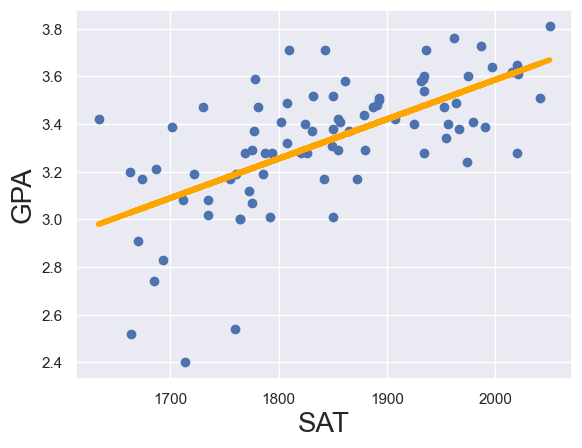

In [16]:
# There are different ways to plot the data - here's the matplotlib code
plt.scatter(x,y)

# Parametrized version of the regression line
yhat = reg.coef_*x_matrix + reg.intercept_

# Non-parametrized version of the regression line
#yhat = 0.0017*x + 0.275

# Plotting the regression line
fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')

# Labelling our axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()